Airbnb Stock Analysis and Prediction

We will be looking at Airbnb's Stock Market data from 2020-present. We will analyse the performance of the stock over the years and will predict the stock prices of the near future using XGBoost Regression.

We will use numpy and pandas for manipulation of the data along the way and use scaling and transformation libraries to learn about data transformation.

We'll be finding the following patterns and trends:



1.   Change in stock price over time.
2.   Daily average return of the stock.
3.   Moving average of the stock.
4.   Correlation between close price and other indicators.
5.   Predict future stock behavior using XGBoost.


**Importing Libraries**

In [121]:
#Data manipulation and data visualization libareies
import pandas as pd
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For time stamps
from datetime import datetime

#Pre-processing Libraries
from sklearn.preprocessing import MinMaxScaler

#ML libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


**Data Extraction**

The dataset was retrieved from Kaggle.
Link: [Airbnb Inc. Stock Market Dataset](https://www.kaggle.com/datasets/whenamancodes/airbnb-inc-stock-market-analysis)

In [122]:
ABNB=pd.read_csv('ABNB.csv')
ABNB

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/11/2020,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,12/14/2020,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,12/15/2020,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,12/16/2020,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,12/17/2020,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
...,...,...,...,...,...,...,...
449,9/26/2022,101.779999,105.360001,101.559998,103.230003,103.230003,5278800
450,9/27/2022,106.040001,108.169998,104.139999,106.370003,106.370003,5081000
451,9/28/2022,106.700996,111.129997,105.779999,110.690002,110.690002,4518200
452,9/29/2022,109.190002,109.474998,105.169998,106.660004,106.660004,4259500


Counting the number of records in the file to verify it has loaded correctly

In [123]:
ABNB.count()

Date         454
Open         454
High         454
Low          454
Close        454
Adj Close    454
Volume       454
dtype: int64

**Information on the data types of the column**

In [124]:
ABNB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


Date column is in object datatype and we have to change it to datetime format to be able to perform data visualization

In [125]:
ABNB[["Date"]] = ABNB[["Date"]].apply(pd.to_datetime)

**Descriptive statistics of the data**

In [126]:
ABNB.describe()

,Open,High,Low,Close,Adj Close,Volume
count,454.000000,454.000000,454.000000,454.000000,454.000000,4.540000e+02
mean,152.735925,156.465595,148.969855,152.729185,152.729185,6.690328e+06
std,28.340932,29.107813,27.490223,28.226659,28.226659,4.417387e+06
min,88.879997,91.459999,86.709999,89.080002,89.080002,1.995400e+06
25%,136.821507,139.842495,132.920002,135.955002,135.955002,4.114375e+06
50%,154.932495,159.099998,151.230004,155.654999,155.654999,5.450000e+06
75%,172.556507,175.974998,168.595005,171.744996,171.744996,7.631375e+06
max,216.240005,219.940002,209.089996,216.839996,216.839996,3.975500e+07


**Exploratory Data Analysis**

We find patterns and trends in the data to gain insights about the stock

**Change in the stock price over time.**

Text(0.5, 1.0, 'Closing Price of Airbnb')

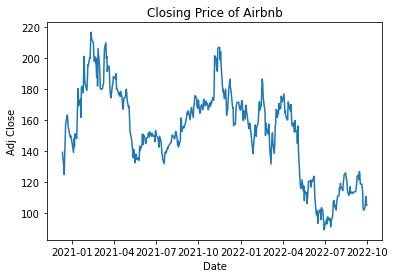

In [127]:
# Historical view of the closing price

Adj_Close=ABNB['Adj Close']
Date=ABNB['Date']
plt.plot(Date,Adj_Close)
plt.ylabel('Adj Close')
plt.xlabel('Date')
plt.title(f"Closing Price of Airbnb")
    

The stock of Airbnb has seen a downward trend in the past year and in the last month there is a slight upward trend in the stock with a hope to revive.

**Total Volume of the stocks being traded each day**

Text(0.5, 1.0, 'Sales Volume for Airbnb')

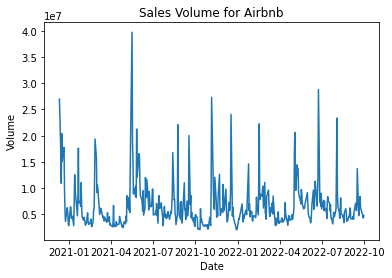

In [128]:
#Historical view of the volume of the stock

Volume=ABNB['Volume']
plt.plot(Date,Volume)
plt.ylabel('Volume')
plt.xlabel('Date')
plt.title("Sales Volume for Airbnb")

**Moving average of the stock**

In [129]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    ABNB[column_name] = ABNB['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'Moving average of Airbnb stock')

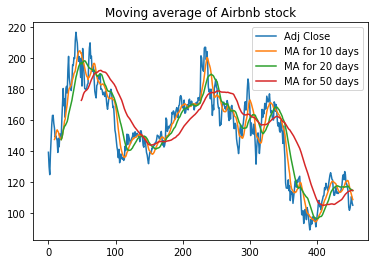

In [130]:
ABNB[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title("Moving average of Airbnb stock")


**Average daily return of the stock**

Text(0.5, 1.0, 'Average daily return in percentage for Airbnb')

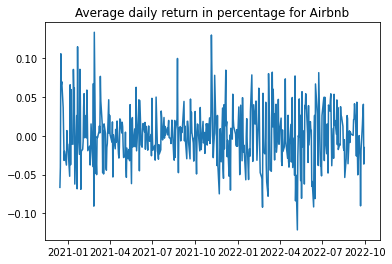

In [131]:
ABNB['Daily Return'] = ABNB['Adj Close'].pct_change()
Daily_return=ABNB['Daily Return']
plt.plot(Date,Daily_return)
plt.title("Average daily return in percentage for Airbnb")


Now we find an overall look at the average daily return percentage using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

Text(0.5, 1.0, 'Distribution of the average return for Airbnb')

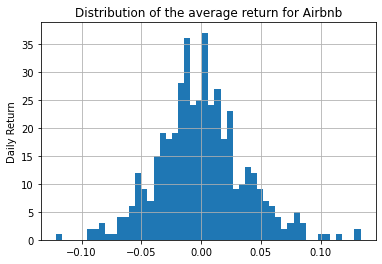

In [132]:
ABNB['Daily Return'].hist(bins=50)
plt.ylabel('Daily Return')
plt.title("Distribution of the average return for Airbnb")

There is a an average fluctuation of (+-)0.05% in the daily return of the stock

**Correlation between close price and other indicators.**

Correlation is a statistical measure that expresses the extent to which two variables are linearly related. 1 being highly correlated and 0 being low correlation. -1 has a negatively high correlation which means there is a high inverse relation.

In [133]:
correl=ABNB.corr()
correl

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Open,1.000000,0.992400,0.992226,0.983982,0.983982,-0.161547,0.960941,0.916561,0.815782,-0.038248
High,0.992400,1.000000,0.990039,0.992992,0.992992,-0.118431,0.957527,0.911686,0.814658,0.045238
Low,0.992226,0.990039,1.000000,0.992306,0.992306,-0.186775,0.953352,0.906288,0.799389,0.037298
Close,0.983982,0.992992,0.992306,1.000000,1.000000,-0.137389,0.951768,0.905475,0.803212,0.116081
Adj Close,0.983982,0.992992,0.992306,1.000000,1.000000,-0.137389,0.951768,0.905475,0.803212,0.116081
Volume,-0.161547,-0.118431,-0.186775,-0.137389,-0.137389,1.000000,-0.127311,-0.099360,-0.019768,0.131999
MA for 10 days,0.960941,0.957527,0.953352,0.951768,0.951768,-0.127311,1.000000,0.973595,0.868382,-0.044349
MA for 20 days,0.916561,0.911686,0.906288,0.905475,0.905475,-0.099360,0.973595,1.000000,0.922688,-0.045657
MA for 50 days,0.815782,0.814658,0.799389,0.803212,0.803212,-0.019768,0.868382,0.922688,1.000000,-0.051607
Daily Return,-0.038248,0.045238,0.037298,0.116081,0.116081,0.131999,-0.044349,-0.045657,-0.051607,1.000000


**Plotting a heatmap to see a clear relation betwen the indicators**

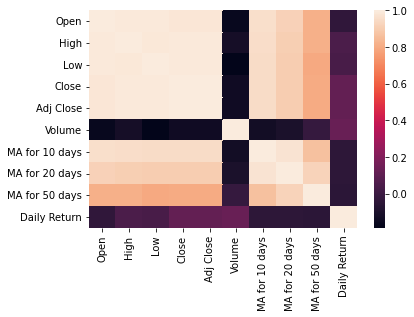

In [134]:
sns.heatmap(correl)

We see there is a linear dependency of Open price, High price and Low price to the Close price of the stock on a day

**Data Scaling and Transformation**

We use min-max scaled from the sci-kit library to scale and transform the data between 0,1.

In [135]:
# Create a new dataframe with only the 'Close' column 
data = ABNB.filter(['Close'])

In [136]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

This is our target variable for the prediction model



In [137]:
# Create a new dataframe with only the 'Open', 'High', 'Low' column 
X=ABNB[['Open', 'High', 'Low']]

These are the features we use for training the prediction model

**Splitting of the data into train and test set**

We use train_test_split from the sci-kit library to split the data easily.We use 80% data from train and 20% for test. Random state allows to split the dataset randomly.

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,scaled_data, test_size=0.20, random_state=42)

# Convert the X_train and y_train to numpy arrays 
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
# x_train.shape

# Convert the test data to a numpy array
x_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]))



**Model Development**

We use XGBRegressor of the XGBoost library to build the prediction model.

Extreme Gradient Boosting (XGBoost) is an open-source library that provides an efficient and effective implementation of the gradient boosting algorithm.

In [139]:
#Model development with parameter tuning
model = XGBRegressor(n_estimators=1000, max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train,y_train)


[13:38:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=6, n_estimators=1000,
             subsample=0.7)

**Prediction using the trained model on the test dataset**


In [140]:
# make predictions for test data
y_pred = model.predict(x_test)


In [141]:
predictor_score = round(model.score(x_test, y_test)*100, 3)
rmse = np.sqrt(np.mean(((y_pred - y_test) ** 2)))
print(' _'*15)

print(f'Score : {predictor_score}%')
print(f'RMSE : {rmse}%')

print(' _'*15)



 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Score : 98.763%
RMSE : 0.32251419346124116%
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


The model has 98.7% accuracy and Root mean square error of 0.32%

**To see the predictions**

In [142]:
# Inverse transform the data
y_pred = np.reshape(y_pred, (y_pred.shape[0], 1))
y_pred1=scaler.inverse_transform(y_pred)
ytest1=scaler.inverse_transform(y_test)

In [143]:
Actual_close=pd.DataFrame(ytest1)
Predicted_close=pd.DataFrame(y_pred1)

Actual_close.rename(columns = {0:'Actual Close'}, inplace = True)
Predicted_close.rename(columns = {0:'Predicted Close'}, inplace = True)

result = pd.concat([Actual_close, Predicted_close], axis=1, join="inner")
result

,Actual Close,Predicted Close
0,150.039993,159.178543
1,199.880005,205.610031
2,165.740005,165.711548
3,111.199997,110.185066
4,141.580002,139.720795
...,...,...
86,103.230003,102.683563
87,153.139999,152.181946
88,180.000000,178.961014
89,180.809998,182.004517


Actual Close vs Predicted Close

**Predicting Close Price of the Airbnb Stock using custom input**

In [144]:
Open=float(input("Enter the Open price of the Stock: "))
Low=float(input("Enter the Day's Low price of the Stock: "))
High=float(input("Enter the Day's High price of the Stock: "))
row = [Open,High,Low]
pd.DataFrame(row)
new_data = asarray([row])

# make a prediction
yhat = model.predict(new_data)
yhat = np.reshape(yhat, (yhat.shape[0], 1))
yhat1=scaler.inverse_transform(yhat)
# summarize prediction
print('Predicted: %.3f' % yhat1)

Enter the Open price of the Stock: 135.5
Enter the Day's Low price of the Stock: 131.15
Enter the Day's High price of the Stock: 145.16
Predicted: 138.198
